# Brief

Instacart is a grocery delivery platform where customers can place a grocery order and have it delivered to them, similar to how Uber Eats and Door Dash work. The platform is looking for shopping habit insights.

# Data
    
Size of the dataset has been reduced so that calculations run faster and missing and duplicate values have been introduced. The original dataset is no longer available on the Instacart website, the CSV files contain a modified version of that data. Distributions were preserved when making modificaions to the original data.
    
instacart_orders.csv

- `order_id`: ID number that uniquely identifies each order
    
- `user_id`: ID number that uniquely identifies each customer account
    
- `order_number`: the number of times this customer has placed an order
    
- `order_dow`: day of the week that the order placed (which day is 0 is uncertain)
    
- `order_hour_of_day`: hour of the day that the order was placed
    
- `days_since_prior_order`: number of days since this customer placed their previous order

products.csv

- `product_id`: ID number that uniquely identifies each product
    
- `product_name`: name of the product
    
- `aisle_id`: ID number that uniquely identifies each grocery aisle category
    
- `department_id`: ID number that uniquely identifies each grocery department category

order_products.csv

- `order_id`: ID number that uniquely identifies each order

- `product_id`: ID number that uniquely identifies each product

- `add_to_cart_order`: the sequential order in which each item was placed in the cart

- `reordered`: 0 if the customer has never ordered this product before, 1 if they have

aisles.csv

- `aisle_id`: ID number that uniquely identifies each grocery aisle category
    
- `aisle`: name of the aisle

departments.csv

- `department_id`: ID number that uniquely identifies each grocery department category
    
- `department`: name of the department

# Task
    
Clean up the data and prepare a report that gives insight into the shopping habits of Instacart customers.


`Preprocessing`

***Verify and fix data types (e.g. make sure ID columns are integers)***
    
Identify and fill in missing values
    
Identify and remove duplicate values
    
Be sure to explain what types of missing and duplicate values you found, how you filled or removed them, why you used those methods, and why you think these missing and duplicate values may have been present in the dataset.

**Libraries**

Common

In [1148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Data**

EDA

In [1149]:
def missing_duplicate_vals(df):
    """Function to return missing values and their respective ratios to total (length).
    Returns a table with values and percentages.
    """
    missing_vals = pd.DataFrame(data=[df.isna().sum().tolist(),['{:.2f}'.format(i)+'%' \
                                                         for i in (df.isna().sum()/df.shape[0]*100).tolist()]],
                        columns=df.columns,
                        index=['NaN Count', 'NaN Percent']).transpose().sort_values(by='NaN Count', ascending=False).reset_index()

    def duplicate_values(df):
        """Function to return duplicate rows for each DF.
        Returns a table with perceived duplicates.
        """
        duplicate_vals = df.duplicated(keep=False)
        return df[duplicate_vals]
        
    return missing_vals, duplicate_values(df)

            

In [1150]:
df_orders = pd.read_csv('/Users/dani/Data Science/TripleTen Projects/Project Data/EDA/instacart_orders.csv', sep=';')

df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [1151]:
missing, duplicate = missing_duplicate_vals(df_orders)
display(missing, duplicate)

,index,NaN Count,NaN Percent
0,days_since_prior_order,28819,6.02%
1,order_id,0,0.00%
2,user_id,0,0.00%
3,order_number,0,0.00%
4,order_dow,0,0.00%
5,order_hour_of_day,0,0.00%


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
30371,1918001,188546,14,3,2,16.0
99462,794638,50898,24,3,2,2.0
119251,408114,68324,4,3,2,18.0
142258,2845099,31189,11,3,2,7.0
145574,794638,50898,24,3,2,2.0
164581,1112182,202304,84,3,2,6.0
200059,1782114,106752,1,3,2,NaN
204042,2125197,14050,48,3,2,3.0
215294,2160484,107525,16,3,2,30.0
223105,2160484,107525,16,3,2,30.0


In [1152]:
display(df_orders.head())

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [1153]:
df_products = pd.read_csv('/Users/dani/Data Science/TripleTen Projects/Project Data/EDA/products.csv', sep=';')

df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [1154]:
missing, duplicate = missing_duplicate_vals(df_products)
display(missing, duplicate)

,index,NaN Count,NaN Percent
0,product_name,1258,2.53%
1,product_id,0,0.00%
2,aisle_id,0,0.00%
3,department_id,0,0.00%


,product_id,product_name,aisle_id,department_id


In [1155]:
display(df_products.head())

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [1156]:
df_order_products = pd.read_csv('/Users/dani/Data Science/TripleTen Projects/Project Data/EDA/order_products.csv', sep=';')

df_order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [1157]:
missing, duplicate = missing_duplicate_vals(df_order_products)
display(missing, duplicate)

,index,NaN Count,NaN Percent
0,add_to_cart_order,836,0.02%
1,order_id,0,0.00%
2,product_id,0,0.00%
3,reordered,0,0.00%


,order_id,product_id,add_to_cart_order,reordered


In [1158]:
display(df_order_products.head())

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [1159]:
df_aisles = pd.read_csv('/Users/dani/Data Science/TripleTen Projects/Project Data/EDA/aisles.csv', sep=';')

df_aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [1160]:
missing, duplicate = missing_duplicate_vals(df_aisles)
display(missing, duplicate)

,index,NaN Count,NaN Percent
0,aisle_id,0,0.00%
1,aisle,0,0.00%


,aisle_id,aisle


In [1161]:
display(df_aisles.head())

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [1162]:
df_departments = pd.read_csv('/Users/dani/Data Science/TripleTen Projects/Project Data/EDA/departments.csv', sep=';')

df_departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [1163]:
missing, duplicate = missing_duplicate_vals(df_departments)
display(missing, duplicate)

,index,NaN Count,NaN Percent
0,department_id,0,0.00%
1,department,0,0.00%


,department_id,department


In [1164]:
display(df_departments.head())

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


`Findings`

instacart_orders.csv
- Our recency feature, 'day_since_prior_order', has ~28.9k missing values (equivalent to ~6% of the total). We will inspect further and decide on two options: 1) remove the values since they are just around our usual threshold of 5%, or 2) impute the values with the average. There are a few instances of duplicate rows, will take a closer look to see if they are partially or full duplicates

- 'order_hour_of_day' has values ranging from 0-6, we will be inferring that 0 = Monday given Python's treatment

products.csv
- 'product_name' has around 1.2k values missing (equivalent to ~2.5# of the total). We will impute a string called 'unknown'

order_products.csv
- 'add_cart_to_order' shows ~800 missing values (a deminimis percentage). Like with instacart_orders.csv, we will analyze this feature future and decide on what to do with it

aisles.csv
- No missing values or duplicate rows

departments.csv
- No missing values or duplicate rows

other
- datatypes look okay across, we could convert a few to integers
- objects have a variation of upper vs lowercase, we will have to choose and standardize

Data cleanup

In [1165]:
df_orders_missing = df_orders.days_since_prior_order.isna()
df_orders[df_orders_missing].head(10)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
111,2651928,142920,1,0,14,NaN
118,174214,148907,1,1,8,NaN
147,2439694,99710,1,6,10,NaN
157,1330993,138895,1,4,6,NaN
158,2835610,195350,1,6,19,NaN


In [1193]:
def fill_method(df, column):
    fig, axs = plt.subplots(figsize=(12,3),ncols=3, nrows=1, sharey=True, sharex=True)
    baseline = df[column]
    baseline_mean = df[column].fillna(baseline.mean())
    baseline_ffill = df[column].ffill()
    sns.kdeplot(df[column], fill=True, color='blue',ax=axs[0]).set_xlabel('no changes')
    sns.kdeplot(baseline_mean, fill=True, color='purple', ax=axs[1]).set_xlabel('mean')
    sns.kdeplot(baseline_ffill, fill=True, color='orange', ax=axs[2]).set_xlabel('ffill')
    fig.suptitle('Imputation methods and their impact')


None

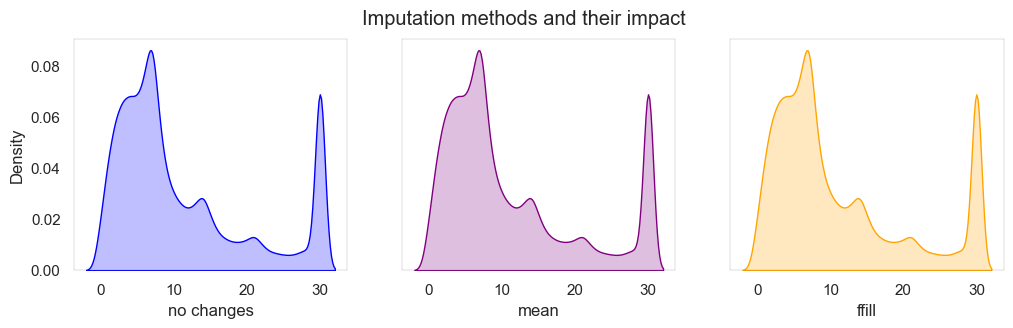

In [1194]:
display(fill_method(df_orders, 'days_since_prior_order'))

In [1168]:
# imputation (cont.)
df_orders['days_since_prior_order'] = df_orders['days_since_prior_order'].ffill().astype(int)
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].dropna()
df_products['product_name'] = df_products['product_name'].str.lower().fillna('unknown')

In [1169]:
# validating duplicate rows are fully duplicate
duplicated = df_orders.duplicated(keep=False)
display(df_orders[duplicated].sort_values(by='user_id'))
# dropping duplicates
df_orders.drop_duplicates(inplace=True)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
441599,2125197,14050,48,3,2,3
204042,2125197,14050,48,3,2,3
142258,2845099,31189,11,3,2,7
284038,2845099,31189,11,3,2,7
99462,794638,50898,24,3,2,2
145574,794638,50898,24,3,2,2
311713,1021560,53767,3,3,2,9
242618,1021560,53767,3,3,2,9
371905,391768,57671,19,3,2,10
354993,391768,57671,19,3,2,10


`Findings`

- Imputing the 'days_since_prior_order' with the 'ffill' method vs 'mean' provides use an acutely similar distribution. Imputing with the mean introduces noise into the feature (utilizing seaborn charts for comparison)

- For 'add_to_cart_order', given it's statistically insignificant % missing values, there is no delta from whichever method we use to either drop or fill. We will go ahead and remove them for now

- 'product_name' has been revised to have 'unknown' replace all NaN values

- When it comes to duplicates, we did a quick check to validate the duplicate rows were fully duplicate and not partial. Confirmed they were fully duplicates and went ahead and removed them

# [A] Easy (must complete all to pass)

[A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [1170]:
print('order_hour_of_day:', df_orders['order_hour_of_day'].sort_values().unique(),
      '\norder_dow:', df_orders['order_dow'].sort_values().unique())

order_hour_of_day: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] 
order_dow: [0 1 2 3 4 5 6]


[A2] What time of day do people shop for groceries?

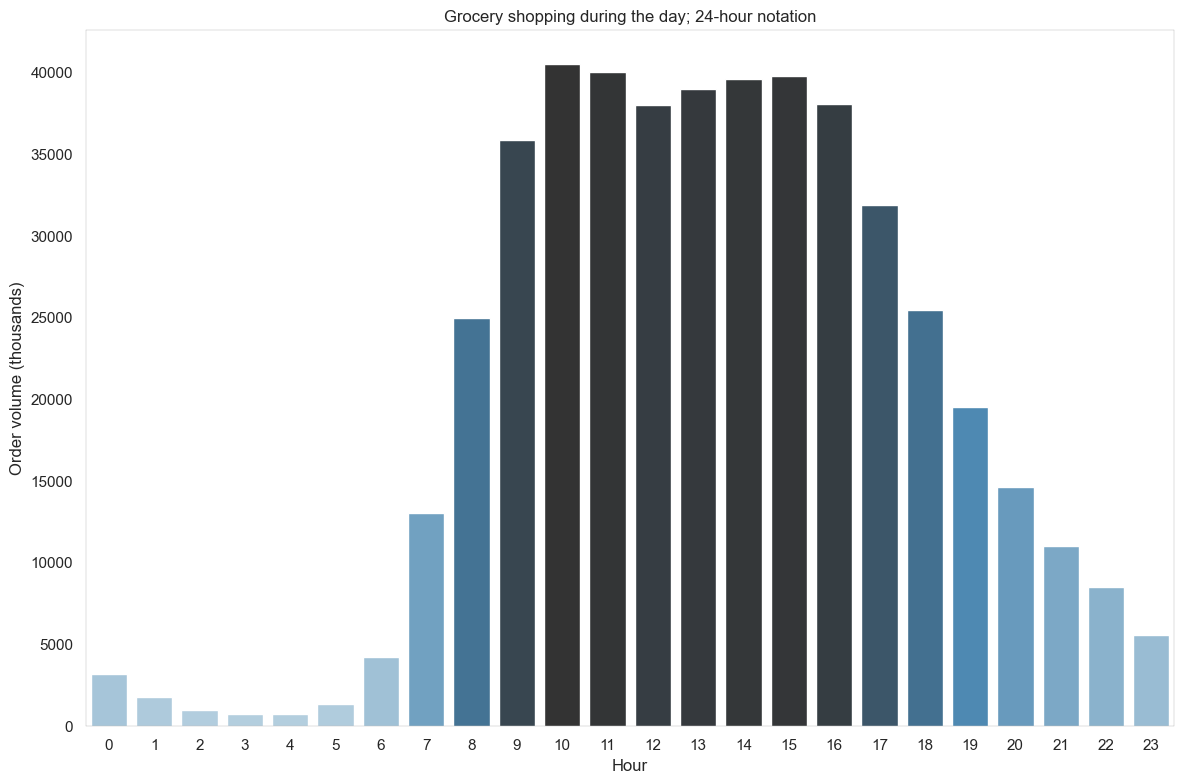

In [1171]:
sns.set(style="white", color_codes=True)
plt.rcParams['axes.linewidth'] = 0.1
fig, ax = plt.subplots(figsize=(12, 8))

orders_subset = df_orders.groupby('order_hour_of_day')['order_number'].agg(['count']).reset_index()

sns.barplot(orders_subset, x='order_hour_of_day', y='count', ax=ax, hue='count', palette='Blues_d', errorbar=None, legend=None)
ax.set(xlabel='Hour')
ax.set(ylabel='Order volume (thousands)')
ax.set(title='Grocery shopping during the day; 24-hour notation')
plt.tight_layout()
plt.show()

`Findings`

We can infer that people largely start their day by ordering food in the morning with a slight decrease in order volume comeing into 12 o'clock then another slight peak from 1pm to 4pm. Once 4pm comes around people start ordering less 

- Another thing we can infer is that people tend to order in the morning to forget about grocery shopping and focusing on their day (usually because of work during the week). Delivery times can also play a role in this chart as the earlier you place an order the higher the guarantee that the order will be delivered that same day
    
- Would also assume that as people end their day they're more focused on cooking the food that they ordered earlier in the day (as they get home from work)


[A3] What day of the week do people shop for groceries?

In [1172]:
day_dict = ['Monday', 'Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
day_bins = [-1, 0, 1, 2, 3, 4, 5, 6]

df_orders['day'] = pd.cut(df_orders['order_dow'],
                      bins=day_bins,
                      labels=day_dict)

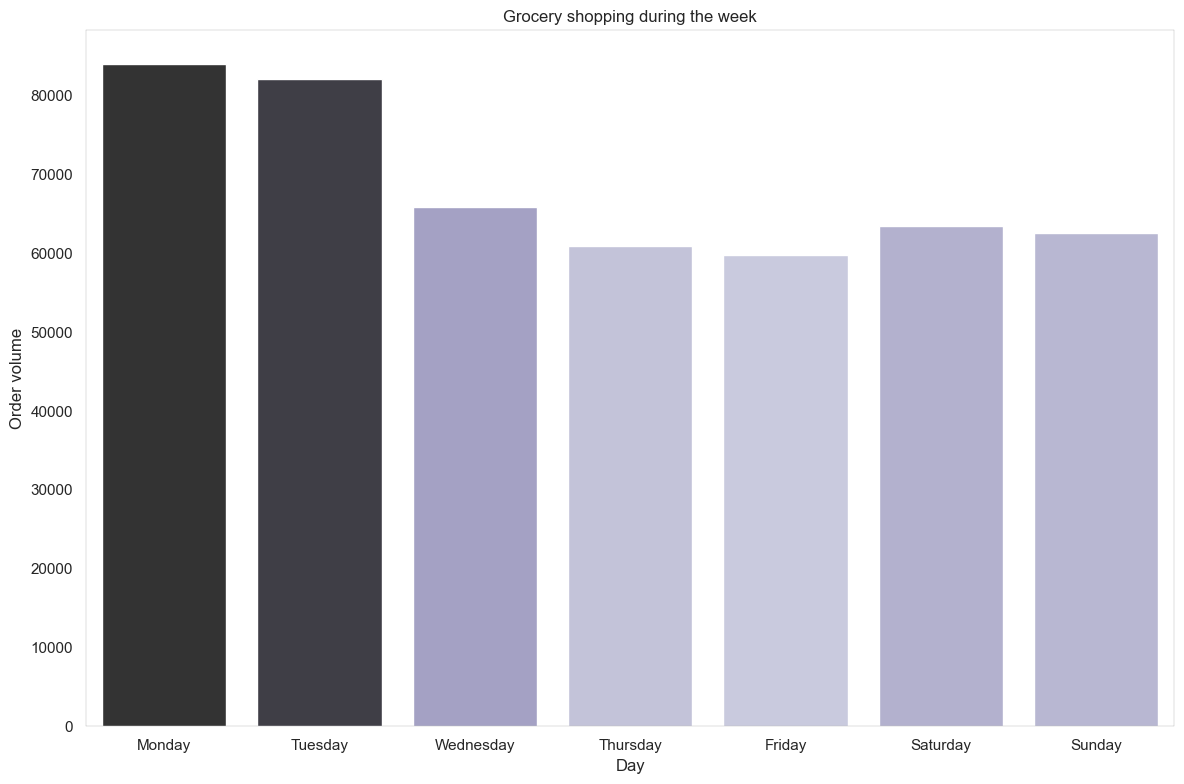

In [1173]:
sns.set(style="white", color_codes=True)
plt.rcParams['axes.linewidth'] = 0.1
fig, ax = plt.subplots(figsize=(12, 8))

orders_subset_dow = df_orders.groupby('day', observed=True)['order_number'].agg(['count']).reset_index()

sns.barplot(orders_subset_dow, x='day', y='count', ax=ax, hue='count', palette='Purples_d', errorbar=None, legend=None)
ax.set(xlabel='Day')
ax.set(ylabel='Order volume')
ax.set(title='Grocery shopping during the week')
plt.tight_layout()
plt.show()

`Findings`

We see shopping peaks at the beginning of the week which taper down as we head into the weekend. This could be due to people going out for food on the weekends (as free time allows to do so) while they rely more on grocery shopping during the week

### [A4] How long do people wait until placing another order?

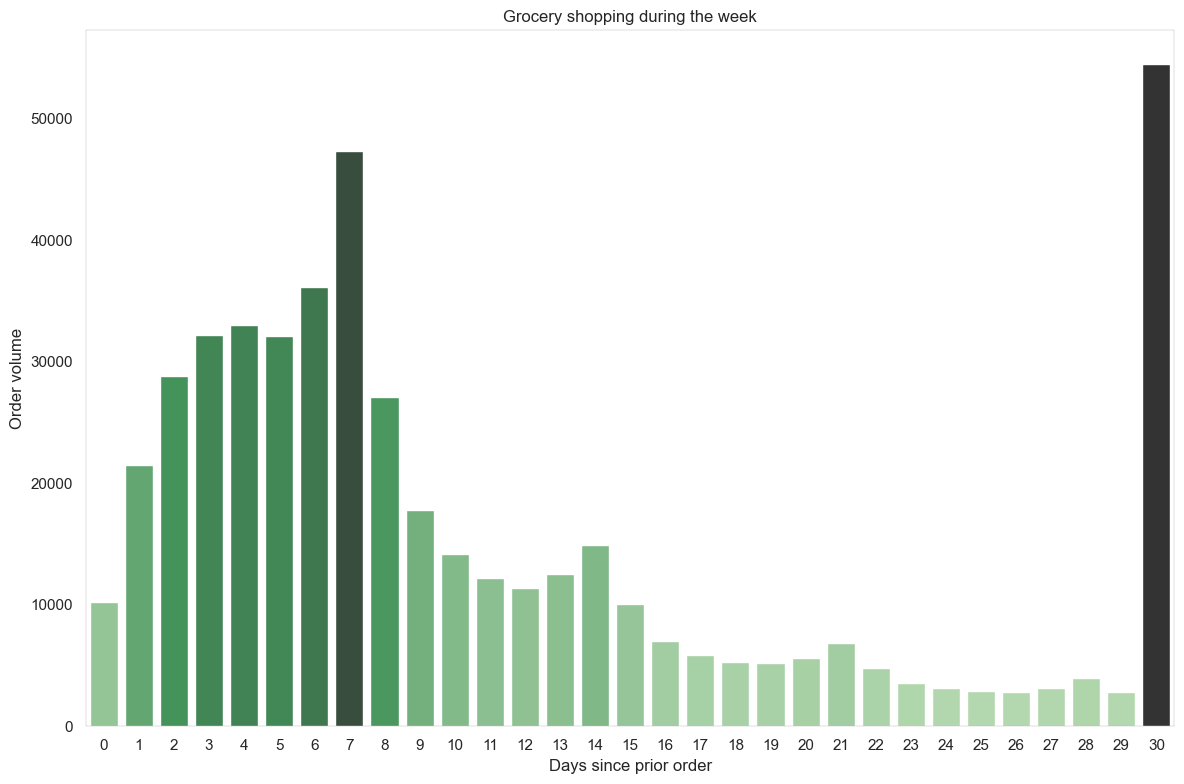

In [1174]:
sns.set(style="white", color_codes=True)
plt.rcParams['axes.linewidth'] = 0.1
fig, ax = plt.subplots(figsize=(12, 8))

orders_subset_prior = df_orders.groupby('days_since_prior_order')['order_number'].agg(['count']).reset_index()

sns.barplot(orders_subset_prior, x='days_since_prior_order', y='count', ax=ax, hue='count', palette='Greens_d', errorbar=None, legend=None)
ax.set(xlabel='Days since prior order')
ax.set(ylabel='Order volume')
ax.set(title='Grocery shopping during the week')
plt.tight_layout()
plt.show()

`Findings`

Customers tend reorder a week into their last order based on initial observations. There is slight deviation at the 30-day wait mark which could be due to payday (not included in this data set - could be people being paid every month and placing their orders then). This could mean there is some customer clusters that consistently leverage the app to order weekly groceries while others just utilize it once a month, most likely going into physical stores. Data on the availability of nearby grocery stores would be beneficial for this analysis

# [B] Medium (must complete all to pass)

[B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

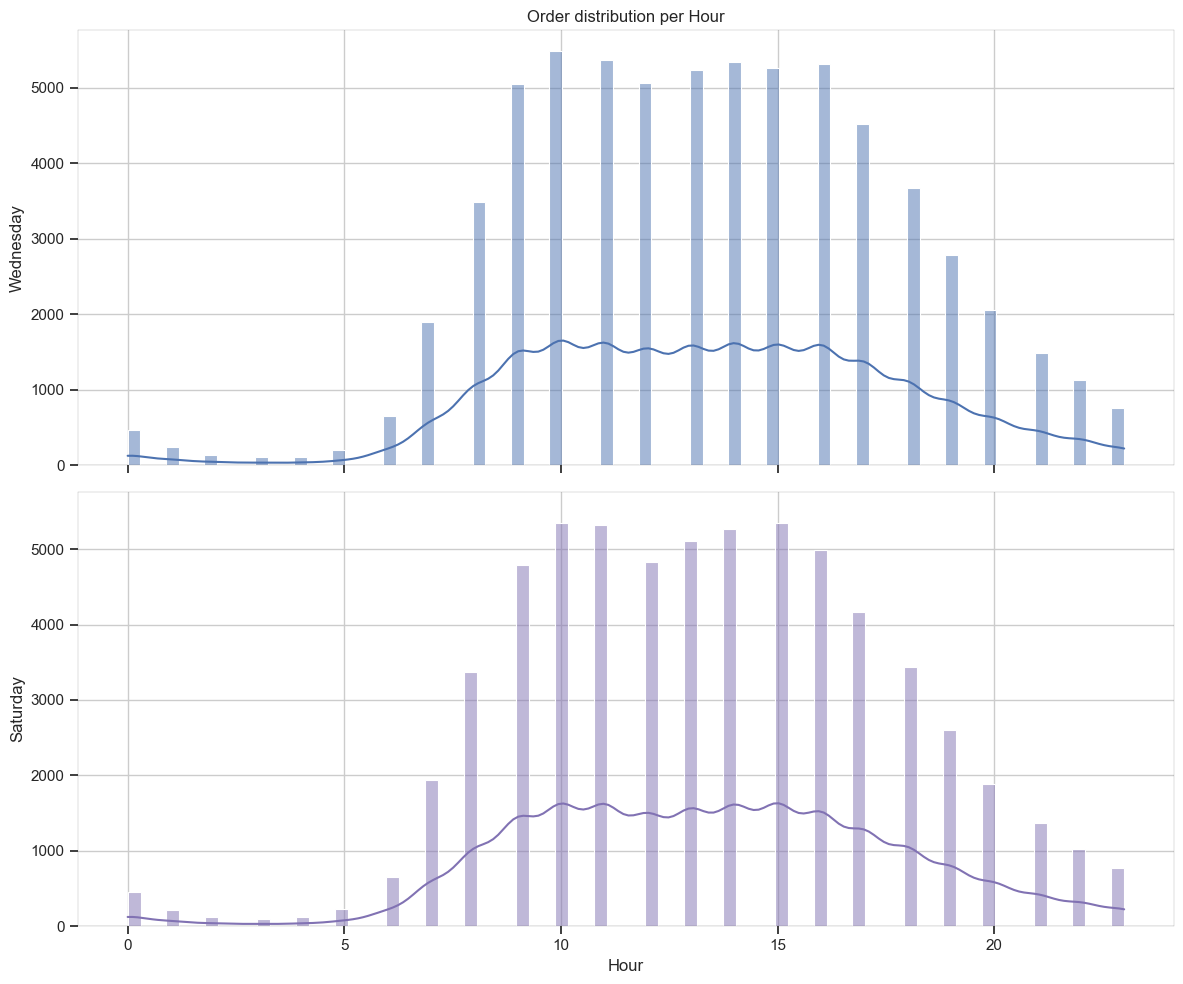

In [1175]:
# Wednesday
orders_filter = df_orders['day'].isin(['Wednesday','Saturday'])
day_grp = df_orders[orders_filter]

wed_orders = df_orders.loc[df_orders['day'] == 'Wednesday']
sat_orders = df_orders.loc[df_orders['day'] == 'Saturday']

sns.set(style="white", color_codes=True)
sns.set_style("ticks",{'axes.grid' : True})
plt.rcParams['axes.linewidth'] = 0.1
fig, axs = plt.subplots(figsize=(12,10),ncols=1, nrows=2, sharey=True, sharex=True)

sns.histplot(wed_orders, x='order_hour_of_day', fill=True, color='b',ax=axs[0], kde=True).set(title='Order distribution per Hour', ylabel='Wednesday')
sns.histplot(sat_orders, x='order_hour_of_day', fill=True, color='m',ax=axs[1], kde=True).set(xlabel='Hour', ylabel='Saturday')

plt.tight_layout()
plt.show()

In [1176]:
wed_orders['order_number'].describe()

count    65833.000000
mean        17.458296
std         18.169659
min          1.000000
25%          5.000000
50%         11.000000
75%         24.000000
max        100.000000
Name: order_number, dtype: float64

In [1177]:
sat_orders['order_number'].describe()

count    63488.000000
mean        17.786511
std         18.020255
min          1.000000
25%          5.000000
50%         11.000000
75%         25.000000
max        100.000000
Name: order_number, dtype: float64

`Findings`

We see some distribution differences between Wednesdays and Saturdays. This variation is concentrated in the afternoons, the tails follow very similar paths

- Would assume this is due to people having more free time during the weekends and well, people like to prep their meals for the week ahead during the weekend

[B2] What's the distribution for the number of orders per customer?

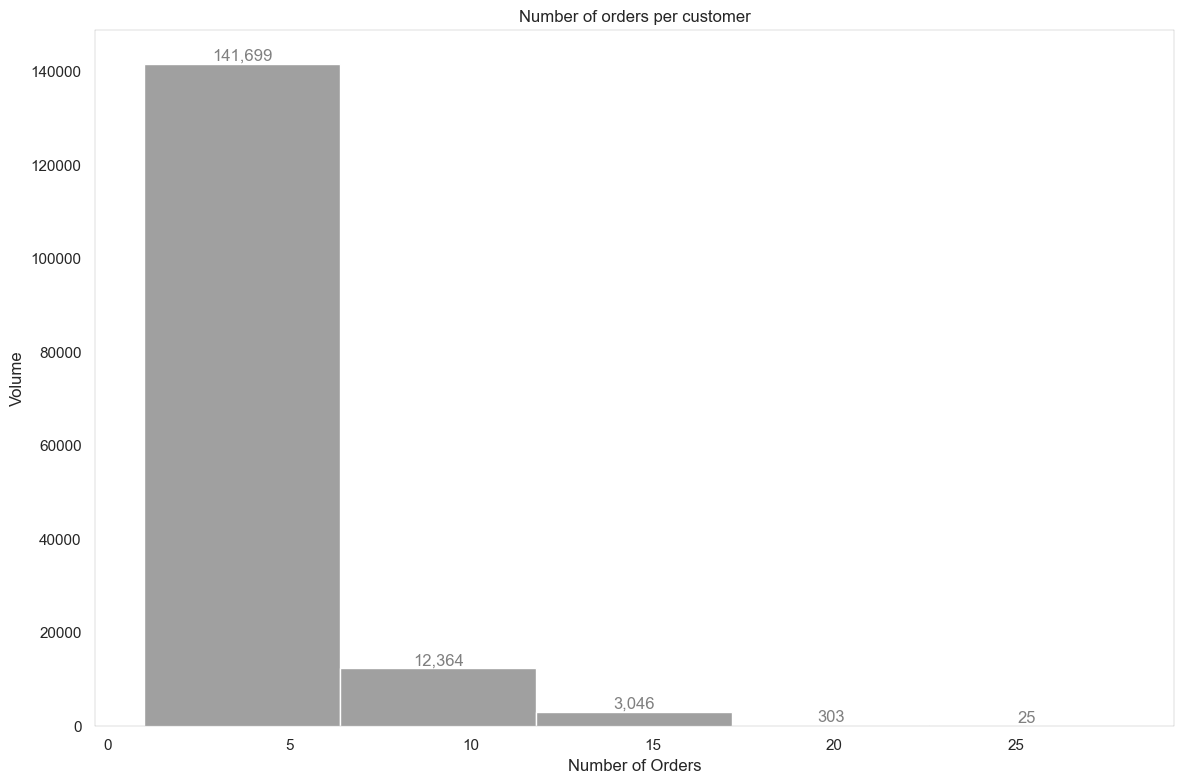

In [1178]:
order_per_cust = df_orders.groupby('user_id')['order_number'].size()

sns.set(style="white", color_codes=True)
plt.rcParams['axes.linewidth'] = 0.1
fig, ax = plt.subplots(figsize=(12, 8))
sns.histplot(order_per_cust, ax=ax, fill=True, color='gray', binwidth=5)
ax.set(xlabel='Number of Orders')
ax.set(ylabel='Volume')
ax.set(title='Number of orders per customer')

bottoms = {}
for bars in ax.containers:
    for bar in bars:
        x, y = bar.get_xy()
        h = bar.get_height()
        if x in bottoms:
            bar.set_y(bottoms[x])
            bottoms[x] += h
        else:
            bottoms[x] = h

    for c in ax.containers:
        labels = [f'{round((v.get_height())):,}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge', color='gray')


plt.tight_layout()
plt.show()

`Findings`

We see a disproportionate amount of orders in the 0-6 range, implying that customers may like to take advantage of the 7 to 14 day trial instacart constantly offers to new customers (which is a popular offering) then slowly start to phase out if not completely cancel their trial period

- Depending on app inception date, it may also show that propspective customers are open to the idea of online grocery shopping but given the small, possible horizon there may not yet be a loyal customer base (at least from what we see in this dataset)

[B3] What are the top 20 popular products (display their id and name)?

In [1179]:
top_n_merge = df_products.merge(df_order_products, on='product_id')
top_n_merge[['product_id', 'product_name']].value_counts().nlargest(20).reset_index()

,product_id,product_name,count
0,24852,banana,66050
1,13176,bag of organic bananas,53297
2,21137,organic strawberries,37039
3,21903,organic baby spinach,33971
4,47209,organic hass avocado,29773
5,47766,organic avocado,24689
6,47626,large lemon,21495
7,16797,strawberries,20018
8,26209,limes,19690
9,27845,organic whole milk,19600


`Findings`

Bananas are the most ordered/popular product!


# [C] Hard (must complete at least two to pass)

[C1] How many items do people typically buy in one order? What does the distribution look like?

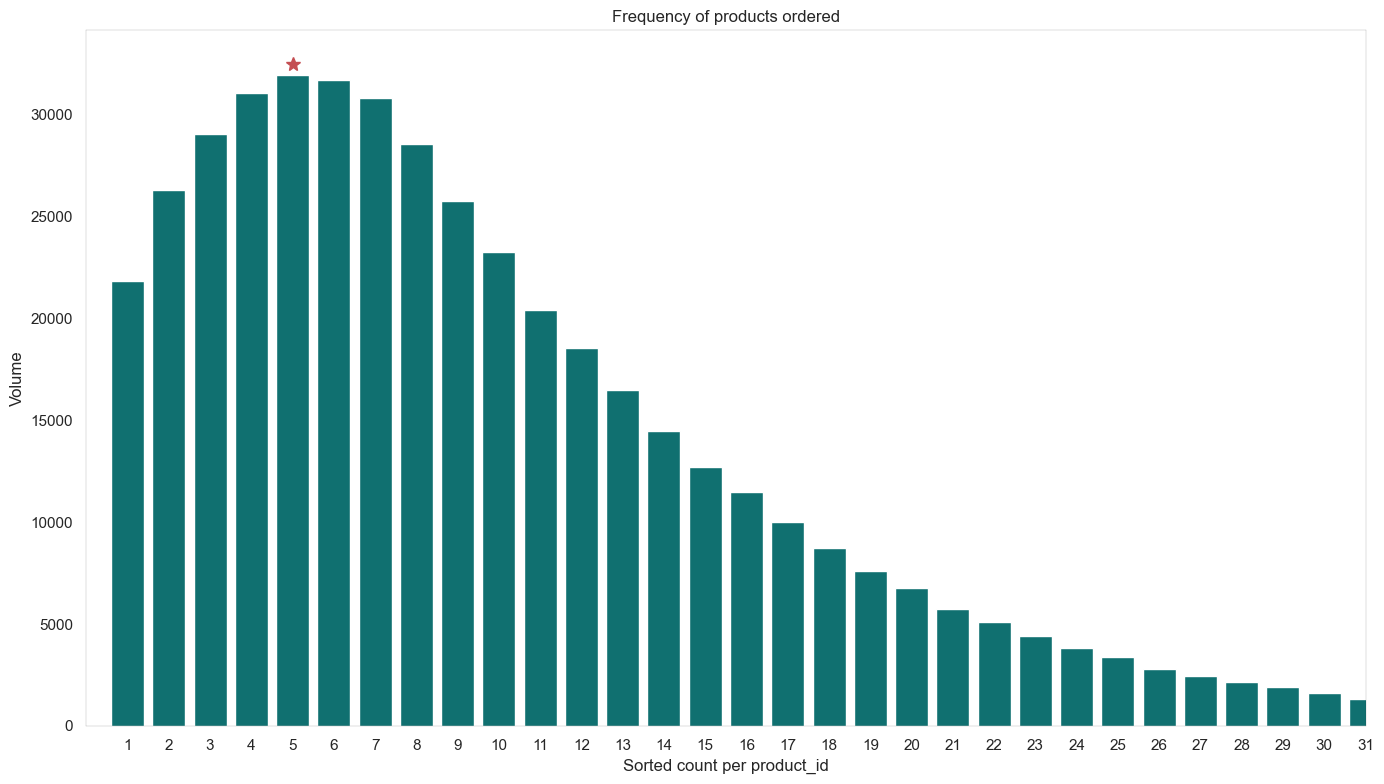

In [1180]:
sns.set(style="white", color_codes=True)
plt.rcParams['axes.linewidth'] = 0.1
fig, ax = plt.subplots(figsize=(14, 8))

item_frequency = df_order_products.groupby('order_id')['product_id'].agg('count')
item_frequency_plot = item_frequency.value_counts().sort_index()
sns.barplot(item_frequency_plot, ax=ax, color='teal')

ax.set(xlabel='Sorted count per product_id')
ax.set(ylabel='Volume')
ax.set(title='Frequency of products ordered')
ax.plot(4, 32500, "*", markersize=10, color="r")
ax.set_xlim(-1,30)
plt.tight_layout()
plt.show()

`Findings`

We can infer from the graph that items peak from 3-8 items per order with a slow decline afterward. Peak number of items ordered is 5.

- People tend to order a smaller amount of items using the instacart app but does not mean it's the same with in-store shopping. 30,000 orders with 4-8 items / 30k to 25k with about 8-9 items and so forth. 5k orders with more than 20 items. Reinforces the thought that most people use instacart for easy purchases then later stop using it in favor of in-store shopping.


[C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [1181]:
filtered_df = df_order_products[df_order_products['reordered'] == 1]
df_product_merge = filtered_df.merge(df_products, on= 'product_id')

df_product_merge.groupby(['product_id','product_name']).size().sort_values(ascending=False).reset_index().head(20)

,product_id,product_name,0
0,24852,banana,55763
1,13176,bag of organic bananas,44450
2,21137,organic strawberries,28639
3,21903,organic baby spinach,26233
4,47209,organic hass avocado,23629
5,47766,organic avocado,18743
6,27845,organic whole milk,16251
7,47626,large lemon,15044
8,27966,organic raspberries,14748
9,16797,strawberries,13945


`Findings`

After merging based on a common key, we sorted the values and displayed the top 20 reordered products (based on our 'reordered' column)

- Breakfast types of food are ordered the most (fruits, vegetables)

[C3] For each product, what proportion of its orders are reorders?

In [1182]:
df_product_merge = df_order_products.merge(df_products, on= 'product_id')
grp = df_product_merge.groupby('product_name')

ncount = grp['reordered'].value_counts()
nlarge = grp['reordered'].count()

product_proportion = ncount / nlarge
product_proportion = pd.Series(product_proportion).reset_index()
product_proportion.loc[product_proportion.reordered == 1].head(20)


,product_name,reordered,0
1,#2 coffee filters,1,0.254545
5,#4 natural brown coffee filters,1,0.358974
7,& go! hazelnut spread + pretzel sticks,1,0.466667
8,(70% juice!) mountain raspberry juice squeeze,1,1.000000
10,+energy black cherry vegetable & fruit juice,1,0.428571
11,0 calorie acai raspberry water beverage,1,0.583333
13,0 calorie fuji apple pear water beverage,1,0.833333
15,0 calorie strawberry dragonfruit water beverage,1,0.782609
17,0% fat black cherry greek yogurt y,1,0.636364
19,0% fat blueberry greek yogurt,1,0.623377


[C4] For each customer, what proportion of their products ordered are reorders?

In [1183]:
df_user_merge = df_orders.merge(df_order_products, on= 'order_id')
grp = df_user_merge.groupby('user_id')

ncount = grp['reordered'].value_counts()
nlarge = grp['reordered'].count()

user_proportion = ncount / nlarge
user_proportion = pd.Series(user_proportion).reset_index()
user_proportion.loc[user_proportion.reordered == 1].sample(20)

,user_id,reordered,0
274135,205924,1,0.111111
44137,33271,1,0.642857
161364,121318,1,0.666667
47180,35548,1,0.288462
114555,86195,1,0.430769
190625,143384,1,0.277778
157675,118494,1,0.543478
158650,119263,1,0.166667
74502,56099,1,0.857143
55335,41623,1,1.000000


[C5] What are the top 20 items that people put in their carts first? 

In [1184]:
top_20_merge = df_products.merge(df_order_products, on='product_id')

row_filter = top_20_merge[top_20_merge['add_to_cart_order'] == 1]

row_filter.groupby(['product_id'])['product_name'].value_counts().nlargest(20)

product_id  product_name               
24852       banana                         15562
13176       bag of organic bananas         11026
27845       organic whole milk              4363
21137       organic strawberries            3946
47209       organic hass avocado            3390
21903       organic baby spinach            3336
47766       organic avocado                 3044
19660       spring water                    2336
16797       strawberries                    2308
27966       organic raspberries             2024
44632       sparkling water grapefruit      1914
49235       organic half & half             1797
47626       large lemon                     1737
196         soda                            1733
38689       organic reduced fat milk        1397
26209       limes                           1370
12341       hass avocados                   1340
5785        organic reduced fat 2% milk     1310
27086       half & half                     1309
22935       organic yellow on

`Findings`

Bananas remain the top item which is a similar the story to the top 20 items ordered table we created. Smaller items, or essentials, look to be added to most carts before anything

# Conclusions

People like to place order to start the week, peaking early during the week with some continuous drop off as the week goes by
    
The same can be said about order time, we see heightened volume to start the morning into the mid-afternoon. With that said, the frequency of orders does not show you the story of the actual amount of items being purchased

- Once you dive into that dataset, we see mostly smaller (<12 items) purchases making up the largest share of the volume. With bananas and breakfast type food leading the pack in terms of items ordered in aggregate

All in all, instacart seems to serve as a good introduction to online ordering to most customers who sign up for the app but with either tradition or just the sheer magnitude of grocery shopping people do (in the U.S.), they tend to leave the larger bulk purchases of groceries to actual in-store shopping where they can select their own items. It is worth taking time period into account as well (e.g. COVID years and their impact on online ordering)
                                                            
It would be interesting to analyze this by age group given I could make the assumption that older people are less likely to use the app compared to younger ages

- Another thing that would tell a better story would be analyzing the share of these orders placed that went through a trial period (which Instacart usually gives out like candy). Examining this together with the actual turnover (who actually decides to pay the instacart monthly or yearly fee and who doesn't) would tell a pretty good story of the app's ability to commercialize on its initiatives and/or flip people's choices                                              
                                                           
- Last thing that would be interesting would be the share of people ordering and staying with the app who have a car vs those who don't